### 1. Import Package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Dataset

In [3]:
df = pd.read_csv('Data/Iris.csv', index_col = 'Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA (Exloratiry Data Analys)

In [4]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
35,4.9,3.1,1.5,0.1,Iris-setosa
38,4.9,3.1,1.5,0.1,Iris-setosa
143,5.8,2.7,5.1,1.9,Iris-virginica


In [5]:
df.drop_duplicates(inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### 4. Visualisasi Data

AttributeError: QuadMesh.set() got an unexpected keyword argument 'v_min'

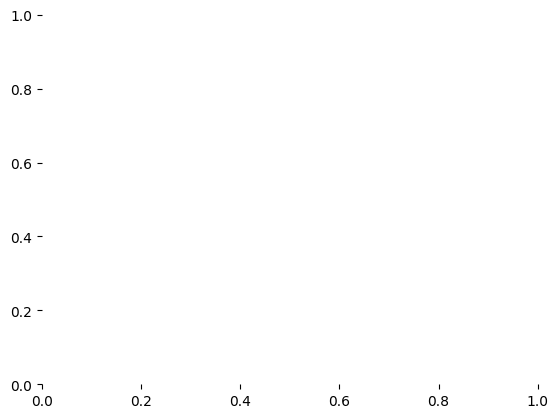

In [7]:
sns.heatmap(data=df.corr(numeric_only=True), v_min=-1, vmax=1, annot=True, cmap='seismic');

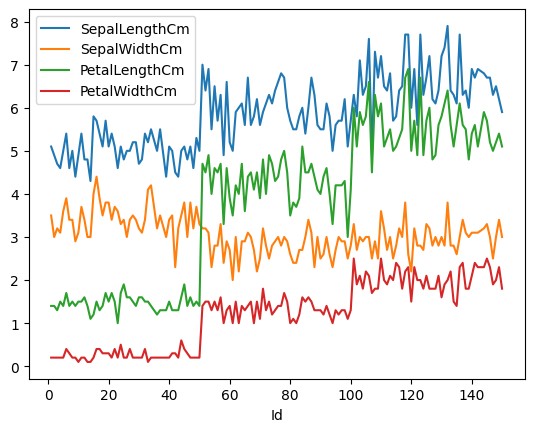

In [9]:
df.plot();

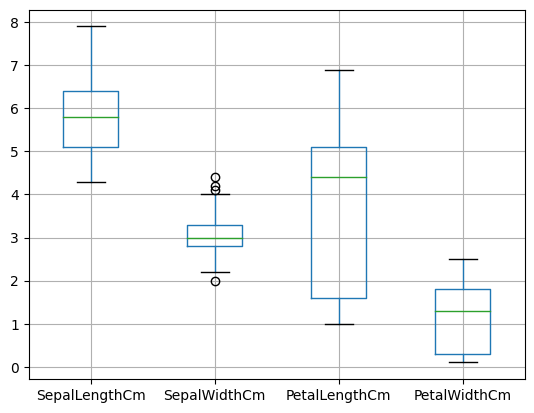

In [10]:
df.boxplot();

In [11]:
sns.pairplot()

TypeError: pairplot() missing 1 required positional argument: 'data'

### Machiene Learning

#### Pre Processing

In [15]:
from sklearn.model_selection import train_test_split #membagi data training dan data tes
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #evaluasi performa model

In [16]:
X = df.drop(columns='Species')
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [18]:
y = df['Species']
y.head()

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((88, 4), (59, 4), (88,), (59,))

#### K- NN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
k_range = list(range(1,26))
score = []

for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

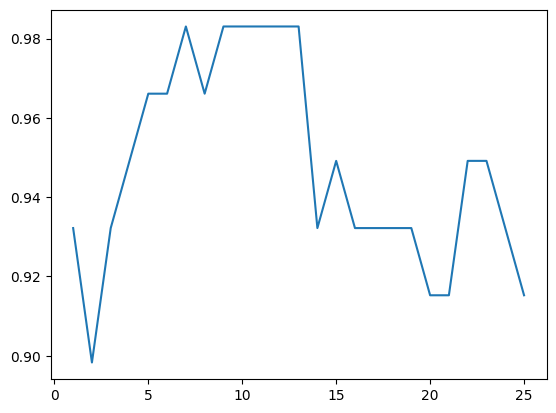

In [28]:
plt.plot(k_range, score);

In [32]:
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9661016949152542


#### Logistic Regresion

In [33]:
from sklearn.linear_model import LogisticRegression

In [36]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9322033898305084


### Dessicion Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9491525423728814


In [41]:
model =[model_knn, model_logreg, model_tree]
acc_score = []
for i in model:
    y_pred = i.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_score.append(accuracy)
print(acc_score)

[0.9661016949152542, 0.9322033898305084, 0.9491525423728814]


###  Save Model

In [42]:
import joblib

In [43]:
joblib.dump(model_knn, 'Model/model_knn.joblib')

['Model/model_knn.joblib']

In [44]:
joblib.dump(model_tree, 'Model/model_tree.joblib')

['Model/model_tree.joblib']

### 7. Testing Model

In [45]:
df1 = pd.read_csv('Data/Iris_new.csv', index_col='Id')
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.2,3.6,1.5,0.3
2,4.9,3.1,1.4,0.2
3,4.8,3.2,1.4,0.2
4,4.6,3.8,1.5,0.2
5,5.0,3.6,1.4,0.4


In [46]:
model = joblib.load('Model/model_knn.joblib')

In [47]:
df1['Prediction'] = model.predict(df1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
df1.tail(50)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Prediction
Id,,,,,
1,5.2,3.6,1.5,0.3,Iris-setosa
2,4.9,3.1,1.4,0.2,Iris-setosa
3,4.8,3.2,1.4,0.2,Iris-setosa
4,4.6,3.8,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.4,Iris-setosa
6,5.4,3.9,1.8,0.4,Iris-setosa
7,4.7,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.6,0.2,Iris-setosa
9,4.4,2.7,1.6,0.2,Iris-setosa


In [48]:
df['Prediction'] = model.predict(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
df.tail(50)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
Id,,,,,,
100,5.7,2.8,4.1,1.3,Iris-versicolor,Iris-versicolor
101,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
102,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica
103,7.1,3.0,5.9,2.1,Iris-virginica,Iris-virginica
104,6.3,2.9,5.6,1.8,Iris-virginica,Iris-virginica
105,6.5,3.0,5.8,2.2,Iris-virginica,Iris-virginica
106,7.6,3.0,6.6,2.1,Iris-virginica,Iris-virginica
107,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor
108,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
